In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#Final 

###Problem #1


A gambler's ruin problem. Alan begins a 'gambler's ruin game' with \$3 and Betty begins with \$2.
States S = {0, 1, 2, 3, 4, 5} indicate Alan's fortune at each step.
At each step, a biased coin with P{Heads} = 0.46 is tossed: Alan wins \$1 on Heads and loses \$1 on Tails.
Compute an appropriately high power of the P-matrix to find each person's probability of being ruined. Use matrix
algebra to verify these probabilities and to find the mean time to absorption. Use simulation to verify the above results and
to approximate probability the game lasts for at least 8 tosses.

0.2693
0.594


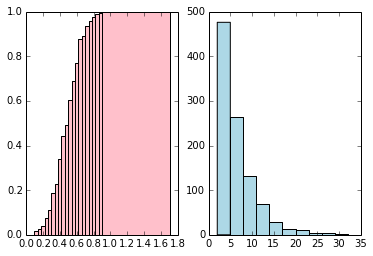

In [26]:
def playGame(heads, tails, probability):
    turns = 0
    while True:
        if((heads == 0) or (tails == 0)):
            break
        
        turns += 1
        if (rand()<probability):
            heads += 1
            tails -= 1
        else:
            heads -= 1
            tails += 1
       
    return [heads != 0, turns]

def getData(amount, headsInitial, tailsInitial, probability):
    return array([playGame(headsInitial, tailsInitial, probability) for i in range(amount)])
    

subplot(121)
x = linspace(0.1,0.9,21)
different_prob = [getData(1000, 3, 2, prob).mean(axis =0)[0] for prob in x] 
bar(x,different_prob, color = "pink")

subplot(122)
hist(getData(1000, 3, 2, 0.46)[:,1], color = "lightblue");

print(mean(getData(10000, 3, 2, 0.46)[:,1]>=8))
print(getData(1000, 3, 2, 0.5).mean(axis =0)[0])

In [27]:
x= array([[1,0,0,0,0,0],
         [.54,0,.46,0,0,0],
         [0,.54,0,.46,0,0],
         [0,0,.54,0,.46,0],
         [0,0,0,.54,0,.46],
         [0,0,0,0,0,1]])
x2 = dot(x,x)
x4 = dot(x2,x2)
x8 = dot(x4,x4)
x16 = dot(x8,x8)
x32 = dot(x16,x16)
x64 = dot(x32,x32)
x128 = dot(x64,x64)
print(x128.round(2))
y = x[1:5][:,[1,2,3,4]]
n = x[1:5][:,[0,5]]
m=inv(eye(4) - y)
print()
print((inv(eye(4) -y)).sum(axis = 1))
print()
print(dot(m,n))


[[ 1.    0.    0.    0.    0.    0.  ]
 [ 0.86  0.    0.    0.    0.    0.14]
 [ 0.69  0.    0.    0.    0.    0.31]
 [ 0.5   0.    0.    0.    0.    0.5 ]
 [ 0.27  0.    0.    0.    0.    0.73]
 [ 0.    0.    0.    0.    0.    1.  ]]

[ 3.65833376  5.77898643  6.09453522  4.29104902]

[[ 0.85853334  0.14146666]
 [ 0.69246378  0.30753622]
 [ 0.49751256  0.50248744]
 [ 0.26865678  0.73134322]]


###Problem #2

A medical screening test has sensitivity 96% and specificity 93%. In a certain population, 500 subjects are tested
and 36 of them test positive.
Assume prior BETA(1.5, 35). Use a Gibbs sampler to find Bayesian point estimates of prevalence and of the predicted
power of a positive test.. Find the 95% two-sided Bayesian probability interval for prevalence, also and upper bounds.
Make appropriate diagnostic graphs of the Markov Chain for prevalence.

0.0022471910112359566
estimated prevalence: 0.0132543372572
predictive power of positive test: 0.155559046175
percentiles:  [ 0.00122234  0.03375606  0.02957707]


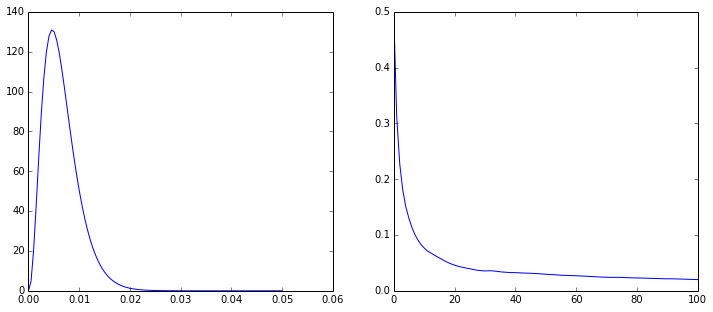

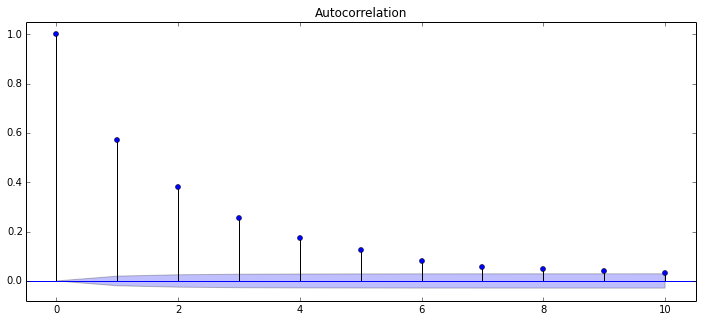

In [28]:
eta = 0.96
theta = 0.93
test_positive = 36
subjects = 500
test_negative = subjects - test_positive
tau = test_positive/subjects
pi = (tau+theta-1)/(eta +theta -1) 
print(pi)
from scipy.stats import beta, binom 
a, b = 1.5, 35

m = 10000
p = [0.0 for i in range(m)]
p[0] = 0.5
for i in range(1,m):
    num_x = p[i-1]*eta 
    den_x = num_x + (1-p[i-1])*(1-theta)
    x = binom.rvs(test_positive,num_x/den_x)
    num_y = p[i-1]*(1-eta)
    den_y = num_y + (1-p[i-1])*theta
    y = binom.rvs(test_negative,num_y/den_y)
    p[i] = beta.rvs(x+y+a, subjects-x-y + b)


z = linspace(0,0.05,100)
figsize(12,5)
subplot(121)
plot(z,beta.pdf(z,x+y+a, subjects-x-y + b)); 
from statsmodels.graphics.tsaplots import plot_acf
subplot(122)
ylim(0,0.5)
xlim(0,100)
plot(cumsum(p)/arange(1,len(p)+1))
plot_acf(p,lags =10); 
pi = mean(p[m//2:]) #python 3 hack 
print("estimated prevalence:", pi)
print("predictive power of positive test:",pi*eta/(pi*eta+(1-pi)*(1-theta)))
print("percentiles: ", percentile(p[m//2:],[2.5,97.5,95]))


$$\mu  =\mathbb{E}(x) = \frac {\alpha}{\alpha + \beta}$$

$$Var(x)  = \frac {\alpha \beta} {(\alpha +\beta)^2 (\alpha+\beta+1)}$$

###Problem #3

An M/M/1/2 queue (barber shop) has attempted arrival rate 4 and service rate 5.
Simulate this process to find the time average distribution of the states.
Use the simulation to values of $\lambda_a$,$L$, $L_Q$ , $W$, $W_Q$ . Compare results for a discretized version of the queue.

In [86]:
from scipy.stats import expon
m = 50000; 
x = [0 for i in range(m)]
t = [0 for i in range(m)]
x[0] = 0 
lam = 4; 
mu = 5; 
p_arr = lam/(lam + mu)
rho = lam/mu

for i in range(1,m):
    arr = np.random.choice([0,1], p=[1-p_arr, p_arr])
    
    if(x[i-1] == 0):
        x[i] = 1
        t[i-1] = expon.rvs(scale =1/lam)
    
    elif ((arr==1) and (x[i-1] == 1)): 
        x[i] = 2 
        t[i-1] = expon.rvs(scale = 1/(lam+mu))
        
    elif ((arr==0) and (x[i-1] == 1)): 
        x[i] = 0
        t[i-1] = expon.rvs(scale = 1/(lam+mu))
        
    elif(x[i-1] == 2):
        x[i] = 1
        t[i-1] = expon.rvs(scale = 1/mu)
    
    else:
        print("error")
        

        
#step(arange(m//2),x[:m//2]);  
x= array(x)
t = array(t)
p = (rho**array([0,1,2]))*(1-rho)/(1-rho**3)
print(p)
print(sum(t))
print(mean(t[x==0]))
print("x == 0 percent:" ,sum(t[x==0])/sum(t))
print(mean(t[x==1]))
print("x == 1 percent:" ,sum(t[x==1])/sum(t))
print(mean(t[x==2]))
print("x == 2 percent:", sum(t[x==2])/sum(t))

[ 0.40983607  0.32786885  0.26229508]
8428.08689121
0.247226564062
x == 0 percent: 0.407473753619
0.110759657374
x == 1 percent: 0.328543294593
0.200276465521
x == 2 percent: 0.263982951789


In [100]:
lam_a = lam*(1 -p[2])
print("lam_a", lam_a)

L = mean(x)
#average number of customers in the system per unit time != mean(X)
print("L",L, p[1]+2*p[2]) #little formula lam*W, where W = average time customer in system
W = (p[1]+2*p[2])/lam_a
print("W",W) #average waiting time in the system
W_q = W - 1/mu 
print("W_q",W_q) #average waiting time in the queue
L_Q = lam_a * W_q
print("L_Q",L_Q) #average customers wiating

lam_a 2.95081967213
L 0.999774559576 0.852459016393
W 0.288888888889
W_q 0.0888888888889
L_Q 0.262295081967


$$Q = \left[\begin{array}{ccc} -\lambda &\lambda & 0 \\ \mu&-(\mu+\lambda)&\lambda \\ 0 & \mu &-\mu \end{array} \right]$$

$$P = \left[\begin{array}{ccc} 56/60 &4/60 & 0 \\ 5/60&51/60&4/60 \\ 0 & 5/60 &55/60 \end{array} \right]$$

In [104]:
P = array([[56,4,0],[5,51,4],[0,5,55]])/60
P2 = dot(P,P)
P4 = dot(P2,P2)
P8 = dot(P4,P4)
P16 = dot(P8,P8)
P32 = dot(P16,P16)
P64 = dot(P32,P32)
print(P64.round(2))

[[ 0.41  0.33  0.26]
 [ 0.41  0.33  0.26]
 [ 0.41  0.33  0.27]]


###Problem #4

Let X have the density function $f(x) = C \exp(–x^3 )$, for x > 0 (and 0 otherwise).
Use any appropriate method to find or accurately approximate C and E(X). Be prepared to explain the method(s).
Use at least two Monte Carlo methods to find P(0.5 < X < 1.5). Consider which methods can be used and which cannot,
and why.

0.725


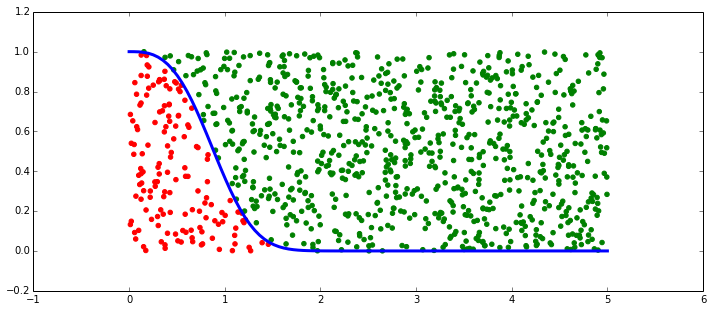

In [92]:
def f(x): return exp(- x**3)


x_range = 5
x = linspace(0,x_range,100)
plot(x,f(x),lw = 3)

m = 1000
x = x_range*rand(m)
y = 1*rand(m)
hits = 0
for i in range(m):
    if(f(x[i])>y[i]):
        hits += 1
        scatter(x[i],y[i], color = "red")
    else:
        scatter(x[i],y[i], color = "green")

print(5*hits/m)        


In [31]:
m = 10000
x = rand(m)
print(sum(f(x)/m)+sum(f(x+1)/m)+sum(f(x+2)/m))

0.891227997336


In [97]:
import scipy
c = scipy.integrate.quad(f,0, 10)[0]
print(c)

0.8929795115692493


In [98]:
def f_norm(x): return exp(- x**3)/c
m = 100000
x = rand(m)
print(sum(x*f_norm(x)/m)+sum((x+1)*f_norm(x+1)/m)+sum((x+2)*f_norm(x+2)/m))

0.505307149998


In [99]:
m = 100000
x = rand(m)+0.5
print(sum(f_norm(x)/m))

0.452359963563


Additional topics to review
Riemann, simple Monte Carlo, acceptance-rejection, and sampling methods for evaluating probabilities and means.
Classification of states and methods of analysis for for finite Markov Chains.Random walks, gambler's ruin.
Medical screening tests. Beta-binomial and Gamma-Poisson Bayesian estimation.
Parametric/nonparametric bootstrapping, Two-sample permutation tests. Ideas of Gibbs samplers ("toy" and useful).
Continuous time Markov processes, Q matrices, balance equations. Queues (terminology: λ a , L, L Q , W, W Q ),